<a href="https://colab.research.google.com/github/abhijithib/nlp/blob/main/Twitter_validation_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

The objective of this project is to develop a classification model to predict whether a review positive or negative by using nlp

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re  
from nltk.stem import WordNetLemmatizer

In [2]:
df=pd.read_csv('/content/twitter_validation.csv',encoding='ISO-8859-1',header=None)
df

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [3]:
df.columns=['id','location','target','text']

In [4]:
df.head()

,id,location,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
df.tail()

,id,location,target,text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [6]:
df.isna().sum()

id          0
location    0
target      0
text        0
dtype: int64

In [7]:
print('length of data is',len(df))

length of data is 1000


In [8]:
df['target'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

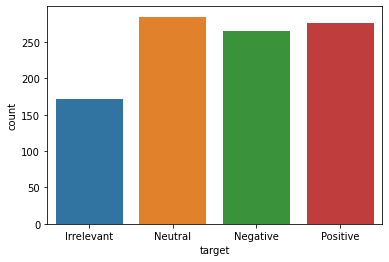

In [9]:
sns.countplot(x='target',data=df)

In [10]:
df.drop(df.index[(df['target']=='Irrelevant')],axis=0,inplace=True)
df

,id,location,target,text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [11]:
print('length is',len(df))

length is 828


In [12]:
df.tail(20)

,id,location,target,text
976,2219,CallOfDuty,Positive,this quarantine got me bored af playing call o...
977,4444,Google,Neutral,This is....odd. @Google suggests the most dead...
979,11431,TomClancysRainbowSix,Negative,@Rainbow6Game when will you ban mnk/cronos pla...
980,5495,Hearthstone,Positive,Team 5 what a great media/announcement day. Yo...
981,12689,WorldOfCraft,Positive,@WarcraftDevs this would be incredible!
982,9446,Overwatch,Negative,Removing mcreeâs noose because ur pussies en...
983,3108,Dota2,Negative,wtf
984,1373,Battlefield,Negative,I have noticed streamers I watch who are now p...
985,10588,RedDeadRedemption(RDR),Neutral,@6th__man playing red dead redemption-\n\nâO...
986,3980,Cyberpunk2077,Positive,This looks like a poster for a 90s action movi...


In [13]:
df.reset_index(drop=True,inplace=True)
df

,id,location,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [14]:
df.drop(['id','location'],axis=1,inplace=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [15]:
df['target']=df['target'].map({'Positive':1,'Negative':-1,'Neutral':0})
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [16]:
df.dtypes

target     int64
text      object
dtype: object

In [17]:
tweets=df.text 
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [18]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
from nltk import TweetTokenizer 
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [21]:
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweets

<ipython-input-21-243a49c37bfd>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: text, Length: 828, dtype: object

In [22]:
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
tweets

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: text, Length: 828, dtype: object

In [23]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: text, Length: 828, dtype: object

In [24]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine play borderland sun...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: text, Length: 828, dtype: object

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(tweets)

In [26]:
print(train_data)

  (0, 691)	0.2608257828483461
  (0, 1004)	0.2608257828483461
  (0, 1130)	0.23509805002803952
  (0, 1996)	0.13277165480466424
  (0, 309)	0.22681557001542715
  (0, 860)	0.17354914655342313
  (0, 807)	0.21432663830218204
  (0, 2761)	0.2608257828483461
  (0, 568)	0.2608257828483461
  (0, 1833)	0.24577602391989378
  (0, 633)	0.22681557001542715
  (0, 376)	0.1515362387424402
  (0, 2287)	0.38864111655856126
  (0, 538)	0.49155204783978756
  (1, 797)	0.4055823664694651
  (1, 2891)	0.4055823664694651
  (1, 2558)	0.3821800909185634
  (1, 1405)	0.4055823664694651
  (1, 3679)	0.36557591217188057
  (1, 2462)	0.3126902562590763
  (1, 3639)	0.26216072802580975
  (1, 2155)	0.24555654927912696
  (2, 1427)	0.1689251539717079
  (2, 486)	0.36574263611909275
  (2, 3432)	0.36574263611909275
  :	:
  (825, 3393)	0.3395996844494919
  (825, 3383)	0.2560582225152134
  (825, 631)	0.22981061112100945
  (825, 997)	0.2315686698425631
  (825, 3373)	0.21750175079084832
  (825, 3226)	0.2904718522758868
  (825, 2527)	0.1

In [27]:
train_data.shape

(828, 3783)

In [28]:
y=df['target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.30,random_state=42)
x_train

<579x3783 sparse matrix of type '<class 'numpy.float64'>'
	with 7250 stored elements in Compressed Sparse Row format>

In [30]:
x_test

<249x3783 sparse matrix of type '<class 'numpy.float64'>'
	with 3255 stored elements in Compressed Sparse Row format>

In [31]:
y_train

array([ 1,  1, -1, -1,  0, -1,  0,  1,  1,  0, -1,  0, -1, -1,  1,  0, -1,
        1, -1, -1,  1,  0,  1, -1, -1,  0,  0,  1, -1,  1, -1,  0,  0, -1,
       -1, -1, -1,  0,  0,  1, -1,  0,  0, -1,  1,  1,  1, -1,  0,  1, -1,
       -1,  1,  0,  1, -1, -1,  1,  1, -1,  1,  0,  1,  1,  0,  1,  0,  0,
       -1,  1,  0,  1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1,  0,  1,
        0,  1,  1,  0,  1, -1,  1,  0, -1,  1, -1, -1,  0,  0, -1,  0,  1,
       -1, -1,  1, -1,  0,  1,  1,  0,  1,  0, -1,  1,  1,  0,  0,  0,  0,
        1, -1,  1,  1,  1,  1,  0,  1,  0, -1,  0,  0,  1,  0, -1, -1, -1,
       -1,  1,  1,  1, -1,  1,  0,  1,  1,  1,  1,  0,  0, -1, -1,  0,  0,
        0, -1,  0,  0,  0,  1,  1,  0, -1, -1,  0,  0,  0, -1, -1, -1, -1,
       -1, -1,  0,  0, -1, -1,  0,  1, -1, -1,  1, -1,  0,  0, -1, -1, -1,
        0,  0, -1,  0,  0,  1,  0, -1, -1, -1,  0,  1,  1,  1,  1,  1,  1,
        0,  1, -1,  1, -1, -1, -1,  0, -1,  1,  1, -1,  1, -1,  0,  0, -1,
        1,  0, -1,  1,  1

In [32]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
svm_model=SVC()
nb_model=MultinomialNB()
db_model=DecisionTreeClassifier()
rb_model=RandomForestClassifier()
lsb_model=[svm_model,nb_model,db_model,rb_model]

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
for i in lsb_model:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('**********************************')
  print(classification_report(y_test,y_pred))
  print('**********************************')

SVC()
**********************************
              precision    recall  f1-score   support

          -1       0.67      0.52      0.59        79
           0       0.46      0.76      0.57        79
           1       0.76      0.48      0.59        91

    accuracy                           0.58       249
   macro avg       0.63      0.59      0.58       249
weighted avg       0.64      0.58      0.58       249

**********************************
MultinomialNB()
**********************************
              precision    recall  f1-score   support

          -1       0.60      0.54      0.57        79
           0       0.47      0.54      0.50        79
           1       0.64      0.59      0.61        91

    accuracy                           0.56       249
   macro avg       0.57      0.56      0.56       249
weighted avg       0.57      0.56      0.56       249

**********************************
DecisionTreeClassifier()
**********************************
              pr